Analysis

• It was known that the next to the equator line the weather gets warmer and based on the graph Latitude versus Temperature, this has been confirmed. That means there is a strong correlation between Latitude and Temperature, however, one interesting fact is that cities located on Northern side have stronger correlation than those cities located on Southern side.

• Regarding the wind speed, even though it shows weak correlation, we could verify that the wind speed increase on cities located far from the equator line. It happens on both sides of the equator line; however, it is more visible on Northern side due to the higher number of cities.

• The weakest relationship can be noted on Latitude versus Humidity. What makes sense if we consider that the level of humidity has more to do with proximity to the ocean than proximity to equator line.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

283de2a7a88431732c550f3139b1a446


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(len(cities))


619


In [3]:
#retrieving data in fahreinheit
units = "imperial"
#creating query url
api_url = "http://api.openweathermap.org/data/2.5/weather?"
parameters = f"{api_url}appid={api_key}&units={units}&q="


In [4]:

#empty list to append information to create a Dataframe
lat = []
temp = []
humidity = []
all = []
speed = []
name = []
country = []
dt =[]
lon = []
i = 1 

# Loop to retrieve weather information for each city to build dataframe and build graphs later
for city in cities:
    query_url = parameters + city
    response = requests.get(query_url).json()
   #try cities in the list and record a number for each city
    try:
        print(f'Processing Record {i} of {len(cities)} | {city}')
        name.append(response['name'])
        all.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        speed.append(response['wind']['speed'])
        i += 1
    except:
        #if city not found, skip and continue
        print(f'City not found. Skipping...')
        i += 1
        pass

Processing Record 1 of 619 | beloha
Processing Record 2 of 619 | busselton
Processing Record 3 of 619 | half moon bay
Processing Record 4 of 619 | lokosovo
Processing Record 5 of 619 | yayva
Processing Record 6 of 619 | khatanga
Processing Record 7 of 619 | valley
Processing Record 8 of 619 | hithadhoo
Processing Record 9 of 619 | ushuaia
Processing Record 10 of 619 | upernavik
Processing Record 11 of 619 | geraldton
Processing Record 12 of 619 | marsh harbour
Processing Record 13 of 619 | barentsburg
City not found. Skipping...
Processing Record 14 of 619 | tilichiki
Processing Record 15 of 619 | albany
Processing Record 16 of 619 | sinnamary
Processing Record 17 of 619 | necochea
Processing Record 18 of 619 | ponta do sol
Processing Record 19 of 619 | butaritari
Processing Record 20 of 619 | fort nelson
Processing Record 21 of 619 | tiksi
Processing Record 22 of 619 | belushya guba
City not found. Skipping...
Processing Record 23 of 619 | atuona
Processing Record 24 of 619 | hermanus

Processing Record 198 of 619 | westport
Processing Record 199 of 619 | teya
Processing Record 200 of 619 | chokurdakh
Processing Record 201 of 619 | tual
Processing Record 202 of 619 | flinders
Processing Record 203 of 619 | abu kamal
Processing Record 204 of 619 | dubti
Processing Record 205 of 619 | hami
Processing Record 206 of 619 | coquimbo
Processing Record 207 of 619 | luanda
Processing Record 208 of 619 | mathathane
Processing Record 209 of 619 | longview
Processing Record 210 of 619 | nanortalik
Processing Record 211 of 619 | hihifo
City not found. Skipping...
Processing Record 212 of 619 | kidal
Processing Record 213 of 619 | mehamn
Processing Record 214 of 619 | solnechnyy
Processing Record 215 of 619 | kalmunai
Processing Record 216 of 619 | maryanskaya
Processing Record 217 of 619 | makat
Processing Record 218 of 619 | pedernales
Processing Record 219 of 619 | hovd
Processing Record 220 of 619 | dauriya
Processing Record 221 of 619 | sao bras de alportel
Processing Record 

Processing Record 389 of 619 | yeletskiy
City not found. Skipping...
Processing Record 390 of 619 | wajir
Processing Record 391 of 619 | nurota
Processing Record 392 of 619 | micheweni
Processing Record 393 of 619 | muhos
Processing Record 394 of 619 | kasama
Processing Record 395 of 619 | yeppoon
Processing Record 396 of 619 | padang
Processing Record 397 of 619 | zharkent
Processing Record 398 of 619 | nizhneyansk
City not found. Skipping...
Processing Record 399 of 619 | puerto narino
Processing Record 400 of 619 | igualada
Processing Record 401 of 619 | altamira
Processing Record 402 of 619 | jiwani
Processing Record 403 of 619 | bathsheba
Processing Record 404 of 619 | bambous virieux
Processing Record 405 of 619 | eyl
Processing Record 406 of 619 | maceio
Processing Record 407 of 619 | axim
Processing Record 408 of 619 | saint-denis
Processing Record 409 of 619 | nemuro
Processing Record 410 of 619 | andros town
Processing Record 411 of 619 | vao
Processing Record 412 of 619 | ak

Processing Record 583 of 619 | koumac
Processing Record 584 of 619 | tigzirt
Processing Record 585 of 619 | henties bay
Processing Record 586 of 619 | qasigiannguit
Processing Record 587 of 619 | richards bay
Processing Record 588 of 619 | cabedelo
Processing Record 589 of 619 | ampanihy
Processing Record 590 of 619 | pareora
Processing Record 591 of 619 | teguise
Processing Record 592 of 619 | bacuit
City not found. Skipping...
Processing Record 593 of 619 | hornbaek
Processing Record 594 of 619 | tubruq
City not found. Skipping...
Processing Record 595 of 619 | soanierana ivongo
Processing Record 596 of 619 | venice
Processing Record 597 of 619 | trapani
Processing Record 598 of 619 | steubenville
Processing Record 599 of 619 | santa maria
Processing Record 600 of 619 | shellbrook
Processing Record 601 of 619 | mount isa
Processing Record 602 of 619 | khorramshahr
Processing Record 603 of 619 | bonavista
Processing Record 604 of 619 | chumikan
Processing Record 605 of 619 | uyovu
Pro

In [5]:
#Creating dataframe
weather_df = pd.DataFrame({
    "City" : name,
    "Cloudiness (%)" : all,
    "Country" : country,
    "Date" : dt,
    "Humidity (%)" : humidity,
    "Latitute" : lat,
    "longitude" : lon,
    "Temperature (F)" : temp,
    "Wind Speed (mph)" : speed
})

weather_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitute,longitude,Temperature (F),Wind Speed (mph)
0,Beloha,59,MG,1604724274,27,-25.17,45.05,85.62,4.12
1,Busselton,0,AU,1604724145,29,-33.65,115.33,82.99,8.34
2,Half Moon Bay,90,US,1604724222,71,37.46,-122.43,50.50,4.70
3,Lokosovo,100,RU,1604724319,97,61.13,74.82,38.28,9.66
4,Yayva,100,RU,1604724319,100,59.33,57.26,35.01,2.15


In [6]:
#saving dataframe in csv
weather_df.to_csv(r'/Users/ulissesmiranda/Documents/GitHub/API_challenge/weather_df.csv',index = False)

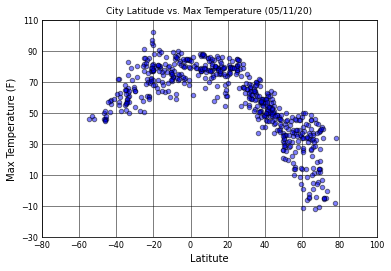

In [53]:
#building all scatter plots from the data frame 

plt.scatter(weather_df["Latitute"], weather_df["Temperature (F)"], s=20, c='blue', alpha=0.5, edgecolor='black')
plt.grid(color='black', linewidth=0.5)

plt.tick_params(axis='both', length = 0)
plt.rcParams['axes.axisbelow'] = True
plt.title('City Latitude vs. Max Temperature (05/11/20)', fontsize=9)
plt.xticks(np.arange(-80, 101, 20), fontsize=8)
plt.yticks(np.arange(-30, 121, 20), fontsize=8)
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (F)")

plt.savefig('Lat_vs_temp.png') 
plt.show()

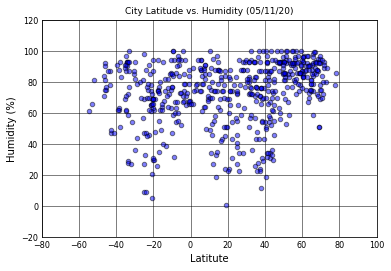

In [54]:
plt.scatter(weather_df["Latitute"], weather_df["Humidity (%)"], s=20, c='blue', alpha=0.5, edgecolor='black')
plt.grid(color='black', linewidth=0.5)

plt.tick_params(axis='both', length = 0)


plt.rcParams['axes.axisbelow'] = True
plt.title('City Latitude vs. Humidity (05/11/20)', fontsize=9)
plt.xticks(np.arange(-80, 101, 20), fontsize=8)
plt.yticks(np.arange(-20, 121, 20), fontsize=8)
plt.xlabel("Latitute")
plt.ylabel("Humidity (%)")

plt.savefig('Lat_vs_humidity.png') 
plt.show()

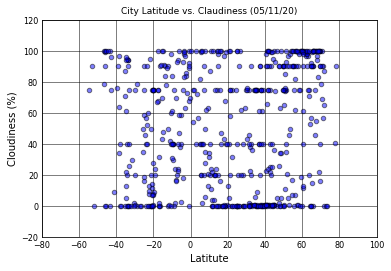

In [55]:
plt.scatter(weather_df["Latitute"], weather_df["Cloudiness (%)"], s=20, c='blue', alpha=0.5, edgecolor='black')
plt.grid(color='black', linewidth=0.5)

plt.tick_params(axis='both', length = 0)


plt.rcParams['axes.axisbelow'] = True
plt.title('City Latitude vs. Claudiness (05/11/20)', fontsize=9)
plt.xticks(np.arange(-80, 101, 20), fontsize=8)
plt.yticks(np.arange(-20, 121, 20), fontsize=8)
plt.xlabel("Latitute")
plt.ylabel("Cloudiness (%)")

plt.savefig('Lat_vs_cloudiness.png')
plt.show()

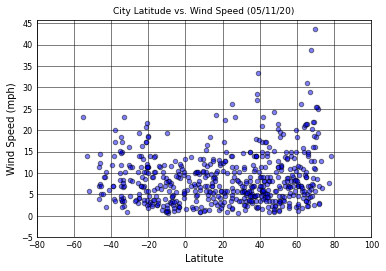

In [56]:
plt.scatter(weather_df["Latitute"], weather_df["Wind Speed (mph)"], s=20, c='blue', alpha=0.5, edgecolor='black')
plt.grid(color='black', linewidth=0.5)

plt.tick_params(axis='both', length = 0)


plt.rcParams['axes.axisbelow'] = True
plt.title('City Latitude vs. Wind Speed (05/11/20)', fontsize=9)
plt.xticks(np.arange(-80, 101, 20), fontsize=8)
plt.yticks(np.arange(-5, 46, 5), fontsize=8)
plt.xlabel("Latitute")
plt.ylabel("Wind Speed (mph)")

plt.savefig('Lat_vs_wind_speed.png')
plt.show()

In [57]:
#separating cities southern and northern hemisphere using latitude data
weather_n = weather_df.loc[weather_df["Latitute"] > 0,["Latitute", "Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]]
weather_s = weather_df.loc[weather_df["Latitute"] < 0,["Latitute", "Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]]


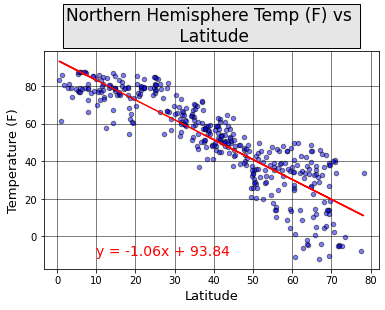

'Correlation coefficient is -0.88.'

In [58]:
#creating scatter plots for cities in southern and northern with correlation and linear regrassion 

correlation = st.pearsonr(weather_n["Latitute"], weather_n["Temperature (F)"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")
rounded_cor


slope, intercept, rvalue, pvalue, stderr = linregress (weather_n["Latitute"], weather_n["Temperature (F)"])
x_values = weather_n["Latitute"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))
plt.scatter(x_values, weather_n["Temperature (F)"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.grid(True, color='black', linewidth=0.5)
plt.annotate(eq,(10,-10),color='red', fontsize=14)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel("Temperature (F)",fontsize=13)
plt.title('Northern Hemisphere Temp (F) vs \n Latitude', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')
plt.savefig('Lat_vs_Temp_reg_n.png')
plt.show()
rounded_cor


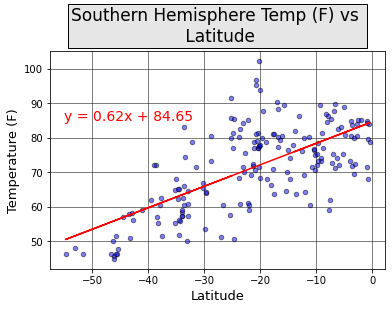

'Correlation coefficient is 0.68.'

In [59]:
correlation = st.pearsonr(weather_s["Latitute"], weather_s["Temperature (F)"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")



slope, intercept, rvalue, pvalue, stderr = linregress (weather_s["Latitute"], weather_s["Temperature (F)"])
x_values = weather_s["Latitute"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))
plt.scatter(x_values, weather_s["Temperature (F)"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.annotate(eq,(-55,85),color='red', fontsize=14)
plt.grid(True, color='black', linewidth=0.5)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Temperature (F)",fontsize=13)

plt.title('Southern Hemisphere Temp (F) vs \n Latitude', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')
plt.savefig('Lat_vs_Temp_reg_s.png')
plt.show()
rounded_cor


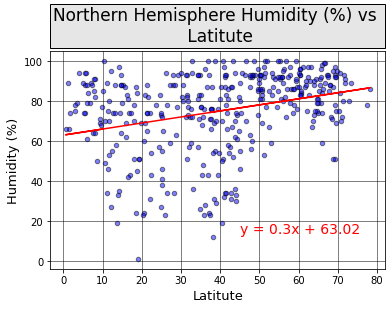

'Correlation coefficient is 0.3.'

In [60]:
correlation = st.pearsonr(weather_n["Latitute"], weather_n["Humidity (%)"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")



slope, intercept, rvalue, pvalue, stderr = linregress (weather_n["Latitute"], weather_n["Humidity (%)"])
x_values = weather_n["Latitute"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))
plt.scatter(x_values, weather_n["Humidity (%)"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.annotate(eq,(45,14),color='red', fontsize=14)
plt.xlabel("Latitute", fontsize=13)
plt.ylabel("Humidity (%)",fontsize=13)
plt.grid(True, color='black', linewidth=0.5)
plt.title('Northern Hemisphere Humidity (%) vs \n Latitute', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')
plt.savefig('Lat_vs_Hum_reg_n.png')
plt.show()
rounded_cor

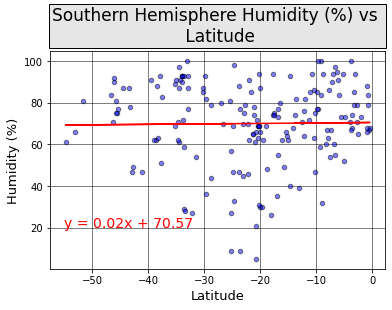

'Correlation coefficient is 0.01.'

In [61]:
correlation = st.pearsonr(weather_s["Latitute"], weather_s["Humidity (%)"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")


slope, intercept, rvalue, pvalue, stderr = linregress (weather_s["Latitute"], weather_s["Humidity (%)"])
x_values = weather_s["Latitute"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))
plt.scatter(x_values, weather_s["Humidity (%)"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.annotate(eq,(-55,20),color='red', fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Humidity (%)",fontsize=13)
plt.title('Southern Hemisphere Humidity (%) vs \n Latitude', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')
plt.grid(True, color='black', linewidth=0.5)
plt.savefig('Lat_vs_Hum_reg_s.png')
plt.show()
rounded_cor

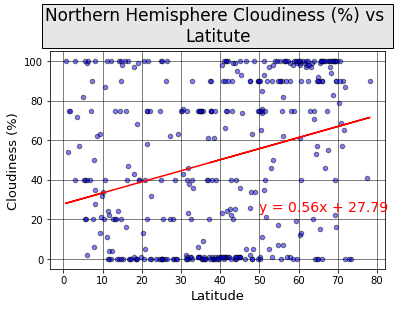

'Correlation coefficient is 0.28.'

In [62]:
correlation = st.pearsonr(weather_n["Latitute"], weather_n["Cloudiness (%)"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")


slope, intercept, rvalue, pvalue, stderr = linregress (weather_n["Latitute"], weather_n["Cloudiness (%)"])
x_values = weather_n["Latitute"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))
plt.scatter(x_values, weather_n["Cloudiness (%)"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.annotate(eq,(50,24),color='red', fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Cloudiness (%)",fontsize=13)
plt.title('Northern Hemisphere Cloudiness (%) vs \nLatitute', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')
plt.grid(True, color='black', linewidth=0.5)
plt.savefig('Lat_vs_clou_reg_n.png')
plt.show()
rounded_cor

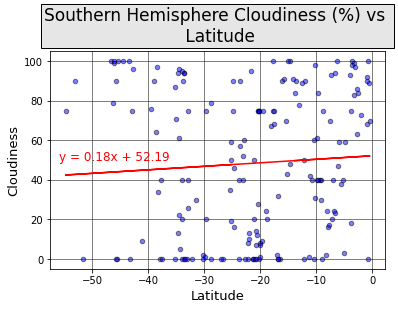

'Correlation coefficient is 0.06.'

In [63]:
correlation = st.pearsonr(weather_s["Latitute"], weather_s["Cloudiness (%)"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")


slope, intercept, rvalue, pvalue, stderr = linregress (weather_s["Latitute"], weather_s["Cloudiness (%)"])
x_values = weather_s["Latitute"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))
plt.scatter(x_values, weather_s["Cloudiness (%)"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.annotate(eq,(-56,50),color='red', fontsize=12)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Cloudiness",fontsize=13)
plt.grid(True, color='black', linewidth=0.5)
plt.title('Southern Hemisphere Cloudiness (%) vs \n Latitude', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')
plt.savefig('Lat_vs_clou_reg_s.png')
plt.show()
rounded_cor

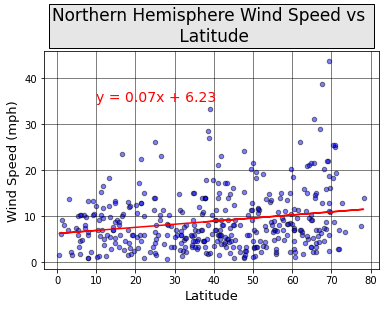

'Correlation coefficient is 0.21.'

In [64]:
correlation = st.pearsonr(weather_n["Latitute"], weather_n["Wind Speed (mph)"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")


slope, intercept, rvalue, pvalue, stderr = linregress (weather_n["Latitute"], weather_n["Wind Speed (mph)"])
x_values = weather_n["Latitute"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))
plt.scatter(x_values, weather_n["Wind Speed (mph)"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.annotate(eq,(10,35),color='red', fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph)",fontsize=13)
plt.grid(True, color='black', linewidth=0.5)
plt.title('Northern Hemisphere Wind Speed vs \n Latitude', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')
plt.savefig('Lat_vs_Wind_reg_n.png')
plt.show()
rounded_cor

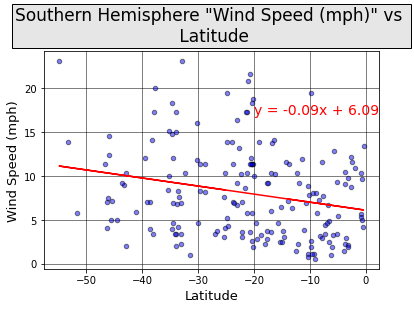

'Correlation coefficient is -0.24.'

In [65]:
correlation = st.pearsonr(weather_s["Latitute"], weather_s["Wind Speed (mph)"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")

slope, intercept, rvalue, pvalue, stderr = linregress (weather_s["Latitute"], weather_s["Wind Speed (mph)"])
x_values = weather_s["Latitute"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))
plt.scatter(x_values, weather_s["Wind Speed (mph)"],s=20, c='blue', alpha=0.5, edgecolor='black')
plt.plot(x_values, regress_values, color='red')
plt.annotate(eq,(-20,17),color='red', fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Wind Speed (mph)",fontsize=13)
plt.title('Southern Hemisphere "Wind Speed (mph)" vs \n Latitude', fontsize=17,bbox={'facecolor':'0.9', 'pad':3}, va='bottom')
plt.grid(True, color='black', linewidth=0.5)
plt.savefig('Lat_vs_Wind_reg_s.png')
plt.show()
rounded_cor